# Multiclass Classification

In [28]:
from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [31]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [32]:
df.duplicated().sum()

0

### Seperate X and Y

In [33]:
X = df.drop(columns=['id', 'NObeyesdad'])
Y = df[['NObeyesdad']]

In [34]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


In [35]:
Y.head()

,NObeyesdad
0,Overweight_Level_II
1,Normal_Weight
2,Insufficient_Weight
3,Obesity_Type_III
4,Overweight_Level_II


In [36]:
Y.value_counts()

NObeyesdad         
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

<Axes: xlabel='NObeyesdad'>

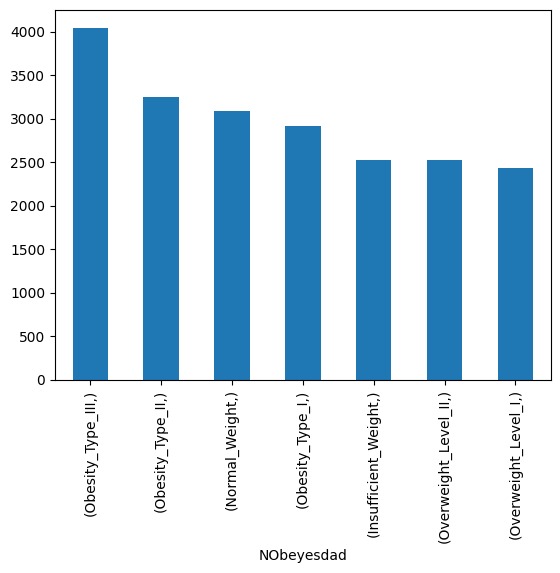

In [37]:
Y.value_counts().plot(kind='bar')

### Seperate cat and con on X feature

In [38]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [39]:
cat

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [40]:
con

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

### Apply Preprocessing on X Feature

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [42]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])
cat_pipe = Pipeline(steps=([('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))]))
pre = ColumnTransformer([('con',num_pipe,con),('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [43]:
X_pre = pre.fit_transform(X)
X_pre.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Apply Ordinal Encoder on Y Feature

In [44]:
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder().set_output(transform='pandas')
Y_ord = ord.fit_transform(Y)
Y_ord[0:5]

,NObeyesdad
0,6.0
1,1.0
2,0.0
3,4.0
4,6.0


### Apply Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y_ord, test_size=0.2, random_state=42)

In [46]:
xtrain.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
9958,-1.202863,0.798937,0.345438,1.039171,0.338364,-0.048349,2.407607,0.636513,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7841,-0.206438,0.608684,-1.251408,-0.836279,1.756085,-0.048349,1.214691,0.636513,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9293,-0.352234,1.370087,1.294114,1.039171,0.169396,-0.631241,-0.288525,-1.024344,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15209,3.016595,-1.377221,-0.299019,-0.836279,0.338364,-1.691863,-1.171141,-1.024344,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16515,-0.147998,1.142541,0.269619,1.039171,0.338364,1.595165,1.214691,0.636513,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
ytrain.head()

,NObeyesdad
9958,2.0
7841,0.0
9293,3.0
15209,2.0
16515,6.0


In [48]:
xtest.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
10317,0.379434,-0.584893,0.911536,1.039171,0.338364,-1.211170,-1.093287,0.157075,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4074,-1.027052,0.569868,-0.299019,-0.836279,0.338364,-0.048349,0.021775,0.636513,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9060,-0.084652,0.150442,-0.120003,0.814419,0.338364,1.344141,1.214691,-1.020025,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11286,1.083034,-0.338770,0.914090,-1.638904,0.338364,-0.042493,-1.171141,-0.834247,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8254,-1.202863,-1.033617,-1.436296,-0.836279,0.338364,-0.048349,-1.171141,2.297369,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [49]:
ytest.head()

,NObeyesdad
10317,4.0
4074,5.0
9060,2.0
11286,3.0
8254,0.0


In [50]:
xtrain.shape

(16606, 30)

In [51]:
xtest.shape

(4152, 30)

In [52]:
ytrain.value_counts()

NObeyesdad
4.0           3242
3.0           2591
1.0           2456
2.0           2367
6.0           2008
0.0           1999
5.0           1943
Name: count, dtype: int64

In [53]:
ytest.value_counts()

NObeyesdad
4.0           804
3.0           657
1.0           626
2.0           543
0.0           524
6.0           514
5.0           484
Name: count, dtype: int64

### Convert Target Feature to_categorical

In [54]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [55]:
ytrain_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [56]:
ytest_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### Create Neural Network

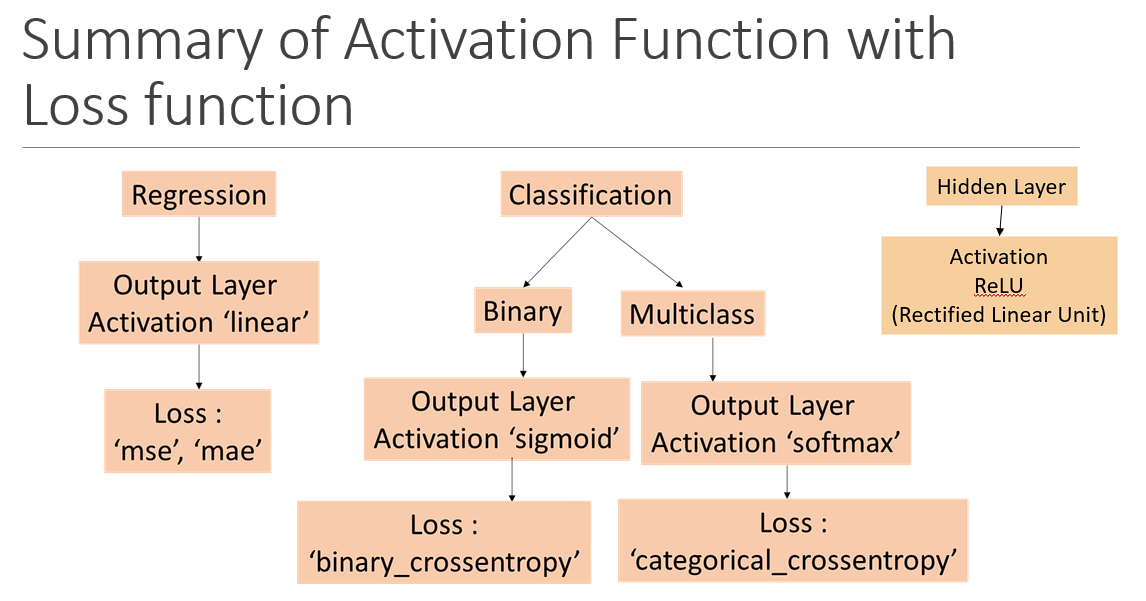

In [60]:
xtrain.shape[1]

30

In [61]:
ytrain.value_counts()

NObeyesdad
4.0           3242
3.0           2591
1.0           2456
2.0           2367
6.0           2008
0.0           1999
5.0           1943
Name: count, dtype: int64

In [62]:
ytrain_cat.shape

(16606, 7)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [64]:
# create a model
model = Sequential()

# add a first hidden layer
model.add(Dense(64, activation='relu', input_shape= (xtrain.shape[1],)))
model.add(Dropout(0.4))

# add a second hidden layer
model.add(Dense(32, activation= 'relu'))
model.add(Dropout(0.3))

# final output layer
model.add(Dense(7, activation='softmax'))


In [65]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [66]:
earlystop = EarlyStopping(monitor='val_loss', patience=10)

### fit the model

In [67]:
hist = model.fit(xtrain, ytrain_cat,
                 validation_split=0.2,
                 epochs=400,
                 callbacks=[earlystop])

Epoch 1/400


416/416 [==============================] - 5s 5ms/step - loss: 1.2588 - accuracy: 0.4992 - val_loss: 0.7636 - val_accuracy: 0.6875
Epoch 2/400
416/416 [==============================] - 2s 4ms/step - loss: 0.8302 - accuracy: 0.6524 - val_loss: 0.5972 - val_accuracy: 0.7652
Epoch 3/400
416/416 [==============================] - 2s 4ms/step - loss: 0.7125 - accuracy: 0.7098 - val_loss: 0.5169 - val_accuracy: 0.8076
Epoch 4/400
416/416 [==============================] - 2s 4ms/step - loss: 0.6348 - accuracy: 0.7439 - val_loss: 0.4655 - val_accuracy: 0.8371
Epoch 5/400
416/416 [==============================] - 3s 7ms/step - loss: 0.6051 - accuracy: 0.7604 - val_loss: 0.4458 - val_accuracy: 0.8465
Epoch 6/400
416/416 [==============================] - 2s 6ms/step - loss: 0.5711 - accuracy: 0.7801 - val_loss: 0.4153 - val_accuracy: 0.8624
Epoch 7/400
416/416 [==============================] - 2s 5ms/step - loss: 0.5522 - accuracy: 0.7909 - val_loss: 0.4052 - val_accuracy: 0.86

### evaluate model

In [68]:
model.evaluate(xtrain, ytrain_cat)

519/519 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8874


[0.329834520816803, 0.8873900771141052]

In [69]:
model.evaluate(xtest, ytest_cat)

130/130 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.8743


[0.36043858528137207, 0.8742774724960327]

### Plot the learning curve

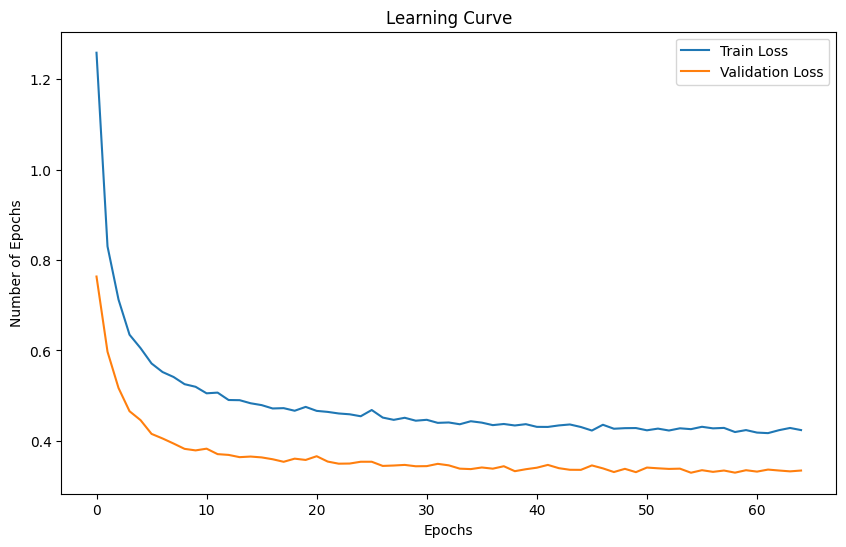

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Number of Epochs')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Predict the Probability for Train and Test

In [71]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

130/130 [==============================] - 0s 2ms/step


In [72]:
yprob_tr[0:5]

array([[1.5648900e-04, 2.5791456e-05, 9.4337463e-01, 2.3036914e-02,
        1.6263180e-03, 1.3122532e-03, 3.0467594e-02],
       [8.3003151e-01, 1.6869177e-01, 4.1506253e-11, 4.0895417e-19,
        2.9517915e-07, 1.2764088e-03, 2.8449068e-10],
       [7.7350105e-12, 3.5754477e-25, 8.0044777e-04, 9.9915910e-01,
        4.0472911e-05, 9.1090032e-14, 8.7900069e-09],
       [3.6521888e-04, 6.2739768e-05, 9.2127007e-01, 6.8877684e-03,
        8.3411572e-04, 1.6263498e-02, 5.4316562e-02],
       [1.6986817e-06, 4.9665559e-04, 2.5123897e-01, 7.0289653e-03,
        2.0461121e-05, 5.7314921e-02, 6.8389827e-01]], dtype=float32)

In [73]:
yprob_ts[0:5]

array([[7.7963041e-16, 6.4420292e-29, 3.0101975e-05, 1.4085643e-09,
        9.9996984e-01, 5.3515932e-17, 3.3870367e-16],
       [1.5153991e-05, 6.6304371e-02, 7.2587188e-03, 7.0181595e-06,
        9.8801502e-06, 8.4113377e-01, 8.5271016e-02],
       [5.5935296e-05, 1.8507025e-04, 8.3515382e-01, 4.2838897e-03,
        1.1631404e-03, 1.9935876e-02, 1.3922220e-01],
       [1.3798926e-11, 1.8861449e-21, 2.7282226e-03, 9.9726981e-01,
        4.2931768e-07, 4.2240305e-11, 1.4704757e-06],
       [7.1030730e-01, 2.8689620e-01, 7.0859230e-10, 3.8878283e-17,
        8.9905467e-07, 2.7955011e-03, 1.3756027e-08]], dtype=float32)

### Get the Predictions

In [74]:
import numpy as np 
ypred_tr = np.argmax(yprob_tr, axis=1)
ypred_ts = np.argmax(yprob_ts, axis=1)

In [75]:
ypred_tr[0:5]

array([2, 0, 3, 2, 6], dtype=int64)

In [77]:
ytrain.head()

,NObeyesdad
9958,2.0
7841,0.0
9293,3.0
15209,2.0
16515,6.0


In [76]:
ypred_ts[0:5]

array([4, 5, 2, 3, 0], dtype=int64)

In [78]:
ytest.head()

,NObeyesdad
10317,4.0
4074,5.0
9060,2.0
11286,3.0
8254,0.0


### Getting original Labels

In [79]:
ytrain_org = ord.inverse_transform(ytrain)
ytest_org = ord.inverse_transform(ytest)

In [80]:
ytrain_org[0:5]

array([['Obesity_Type_I'],
       ['Insufficient_Weight'],
       ['Obesity_Type_II'],
       ['Obesity_Type_I'],
       ['Overweight_Level_II']], dtype=object)

In [81]:
ytest_org[0:5]

array([['Obesity_Type_III'],
       ['Overweight_Level_I'],
       ['Obesity_Type_I'],
       ['Obesity_Type_II'],
       ['Insufficient_Weight']], dtype=object)

In [82]:
ypred_tr_lb = ord.inverse_transform(pd.DataFrame([ypred_tr]).T)
ypred_ts_lb = ord.inverse_transform(pd.DataFrame([ypred_ts]).T)

In [83]:
ypred_tr_lb[0:5]

array([['Obesity_Type_I'],
       ['Insufficient_Weight'],
       ['Obesity_Type_II'],
       ['Obesity_Type_I'],
       ['Overweight_Level_II']], dtype=object)

In [84]:
ypred_ts_lb[0:5]

array([['Obesity_Type_III'],
       ['Overweight_Level_I'],
       ['Obesity_Type_I'],
       ['Obesity_Type_II'],
       ['Insufficient_Weight']], dtype=object)

### Plot the confusion matrix

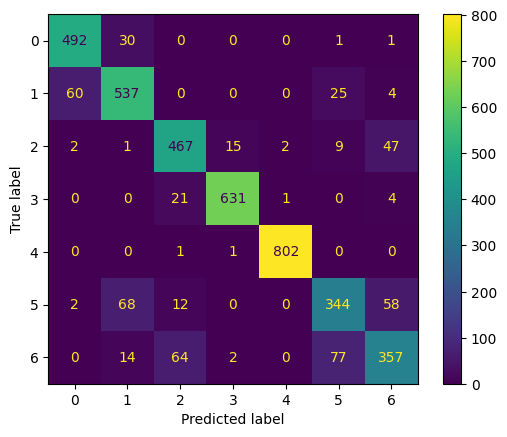

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest_org, ypred_ts_lb)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [86]:
from sklearn.metrics import classification_report
print(classification_report(ytest_org, ypred_ts_lb))

                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.94      0.91       524
      Normal_Weight       0.83      0.86      0.84       626
     Obesity_Type_I       0.83      0.86      0.84       543
    Obesity_Type_II       0.97      0.96      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.75      0.71      0.73       484
Overweight_Level_II       0.76      0.69      0.72       514

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152

